## Imports and setup

In [49]:
import matplotlib.pyplot as plt

# ploting style
import mplhep as hep
plt.style.use(hep.style.ATLAS)
plt.rcParams['legend.loc'] = 'upper left'
figsize = (7, 8)

# functions to process data
from performance.utils import process_csv_dir

INPUT_DIR = "data/odd_traccc_old_200k_window/"
OUPUT_DIR = INPUT_DIR

cpu_data_instances, gpu_data_instances = process_csv_dir(INPUT_DIR)

## Define functions for plotting

In [88]:
def plot_var_vs_instance(data_dict, 
                         variable='Inferences/Second', 
                         ylabel='GPU Throughput (infer/sec)',
                         save_name='instances_vs_throughput_gpu.pdf',
                         outdir='data',
                         ratio=True,
                         save=True):
    
    instances = sorted(data_dict.keys())
    concurrencies = data_dict[1]['Concurrency'].values
    
    con_vals = []
    for con in concurrencies:
        vals = []
        for i in instances:
            val = data_dict[i][data_dict[i]['Concurrency'] == con][variable].values
            if len(val) == 0:
                print(f'No data for {i} instances and {con} \
                    concurrent requests, setting to 0')
                vals.append(0.0)
            else:
                vals.append(val[0])
        con_vals.append(vals)
    
    if ratio:
        
        ratio_vals = []
        for i in range(1, len(concurrencies)):
            ratio_vals.append([x/y for x, y in zip(con_vals[i], con_vals[0])])
            
        colors = plt.get_cmap('tab10')
            
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, 
                                       sharex=True, 
                                       gridspec_kw={'height_ratios': [4, 1]})
        
        for i, con in enumerate(concurrencies):
            ax1.plot(instances, con_vals[i], 'o-', 
                     color=colors(i), label=f'{con} requests')
            
        for i, con in enumerate(concurrencies[1:]):
            ax2.plot(instances, ratio_vals[i], 'o-', 
                     color=colors(i+1), label=f'{con} requests')
            
        ax1.set_ylabel(ylabel, loc='top')
        ax1.set_title('             1 NVIDIA A100 SXM4 80GB', loc='left', fontsize=12)
        # ax1.set_ylim(2.5, 4.2)
        ax1.legend()
        
        ax2.set_xlabel('Number of Triton Model Instances', loc='right')
        ax2.set_ylabel('Ratio')
        
        plt.subplots_adjust(hspace=0.07) 
        
        if save:
            plt.savefig(f'{outdir}/{save_name}', bbox_inches='tight')
        
    else:
        plt.figure(figsize=(5, 5))
        for con in concurrencies:
            plt.plot(instances, con_vals[con], 'o-', label=f'{con} \
                concurrent requests')
        plt.xlabel('Number of Triton Model Instances', loc='right')
        plt.ylabel(ylabel, loc='top')
        plt.legend()
        
        if save:
            plt.savefig(f'{outdir}/{save_name}', bbox_inches='tight')

In [89]:
def plot_var_vs_concurrency(data_dict, 
                            variable='Inferences/Second', 
                            ylabel='GPU Throughput (infer/sec)',
                            save_name='concurrency_vs_throughput_gpu.pdf',
                            ratio=True,
                            outdir='data',
                            max_concurrency=6,
                            save=True):
    
    instances = sorted(data_dict.keys())
    concurrencies = data_dict[1]['Concurrency'].values
    
    if ratio:
        
        ratio_vals = []
        for i in range(1, len(instances)):
            ratio_vals.append([x/y for x, y in zip(data_dict[i][variable].values, 
                                                   data_dict[1][variable].values)])
            
        colors = plt.get_cmap('tab10')
            
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, 
                                       sharex=True, 
                                       gridspec_kw={'height_ratios': [4, 1]})
        
        for i, instance in enumerate(instances):
            if i < max_concurrency:
                ax1.plot(concurrencies, data_dict[instance][variable].values, 'o-', 
                         color=colors(i), label=f'{instance} instances')
            
        for i, instance in enumerate(instances[1:]):
            if i < (max_concurrency - 1):
                ax2.plot(concurrencies, ratio_vals[i], 'o-', 
                         color=colors(i+1), label=f'{instance} instances')
            
        ax1.set_ylabel(ylabel, loc='top')
        ax1.set_title('             1 NVIDIA A100 SXM4 80GB', loc='left', fontsize=12)
        # ax1.set_ylim(2.5, 4.2)
        ax1.legend()
        
        ax2.set_xlabel('Number of Concurrent Requests', loc='right')
        ax2.set_ylabel('Ratio')
        
        plt.subplots_adjust(hspace=0.07) 
        
        if save:
            plt.savefig(f'{outdir}/{save_name}', bbox_inches='tight')
    
    else:  
        plt.figure(figsize=(5, 5))
        for i, instance in enumerate(instances):
            if i < max_concurrency:
                plt.plot(concurrencies, data_dict[instance][variable].values, 
                         'o-', label=f'{instance} instances')
        plt.xlabel('Number of Concurrent Requests', loc='right')
        plt.ylabel(ylabel, loc='top')
        plt.legend()
        
        if save:
            plt.savefig(f'{outdir}/{save_name}', bbox_inches='tight')

## Plots of GPU Performance

#### Throughput

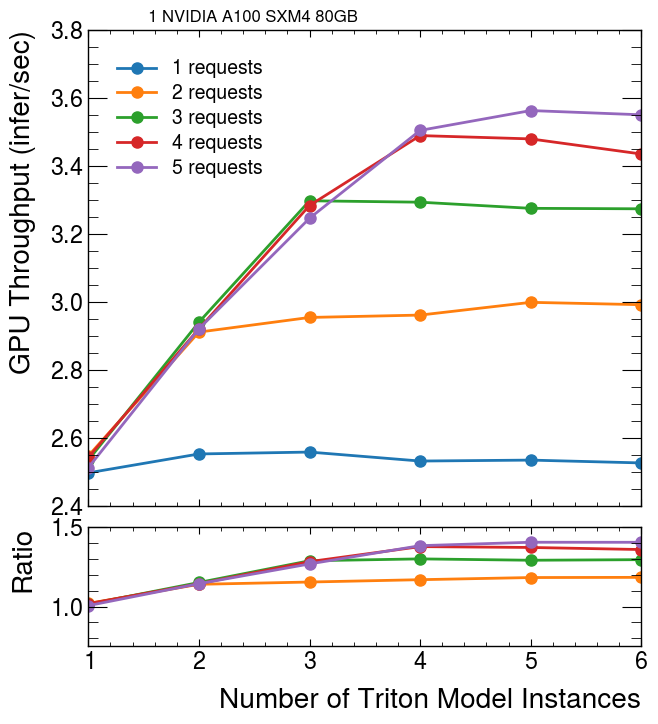

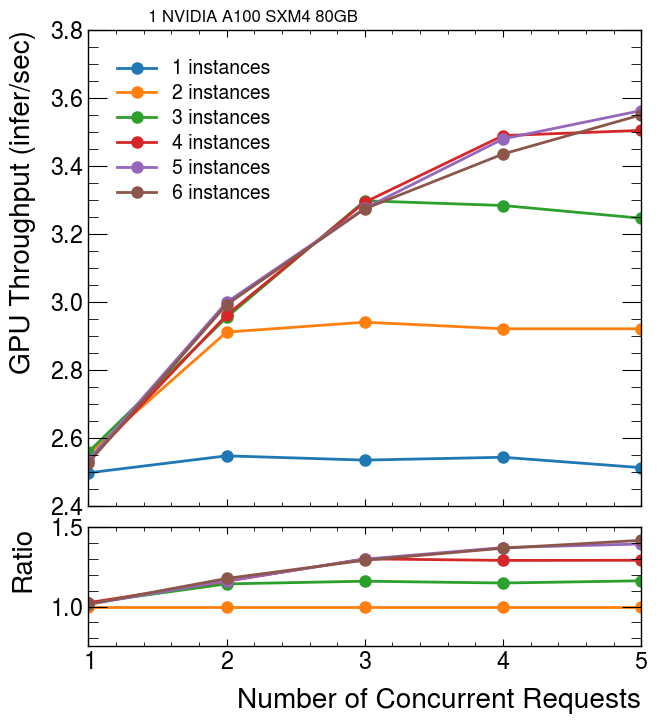

In [90]:
plot_var_vs_instance(gpu_data_instances, outdir=OUPUT_DIR)
plot_var_vs_concurrency(gpu_data_instances, outdir=OUPUT_DIR)

#### Resource utilization

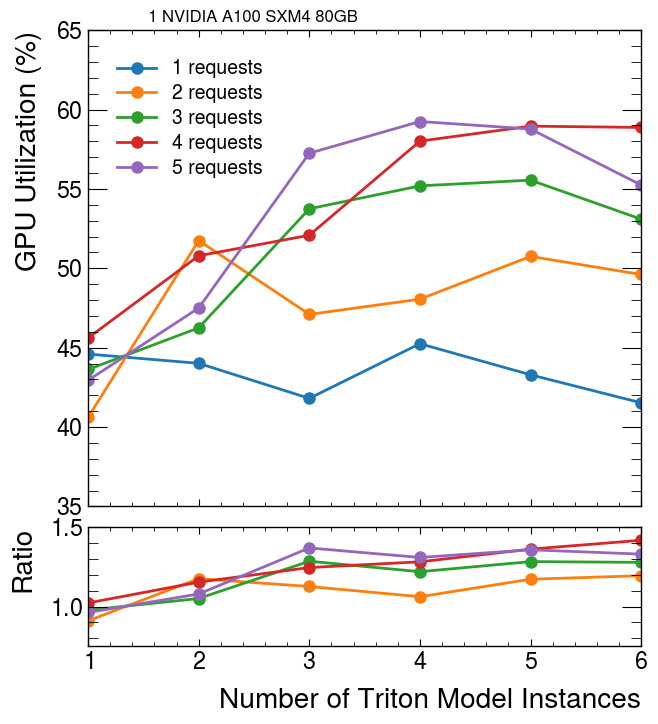

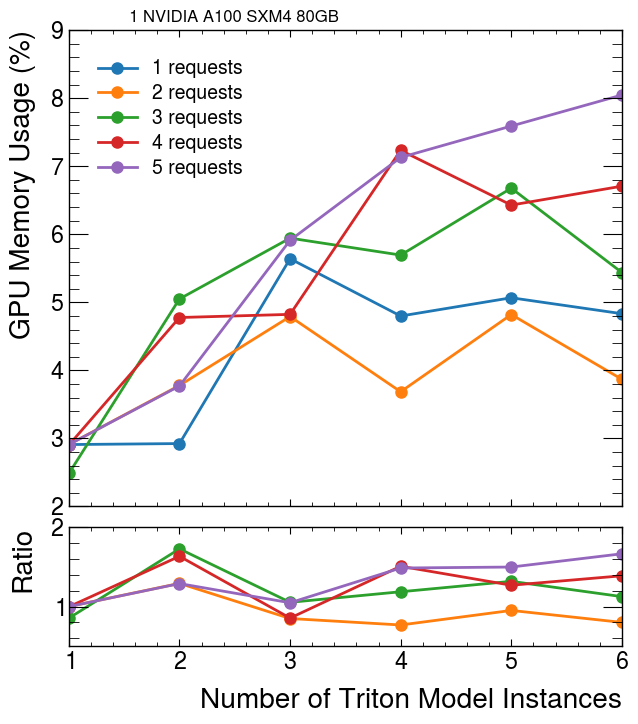

In [91]:
plot_var_vs_instance(gpu_data_instances,
                        variable='total_gpu_usage',
                        ylabel='GPU Utilization (%)',
                        save_name='instances_vs_gpu_utilization.pdf')
plot_var_vs_instance(gpu_data_instances,
                        variable='percent_gpu_memory',
                        ylabel='GPU Memory Usage (%)',
                        save_name='instances_vs_gpu_memory_percent.pdf')

#### Latency

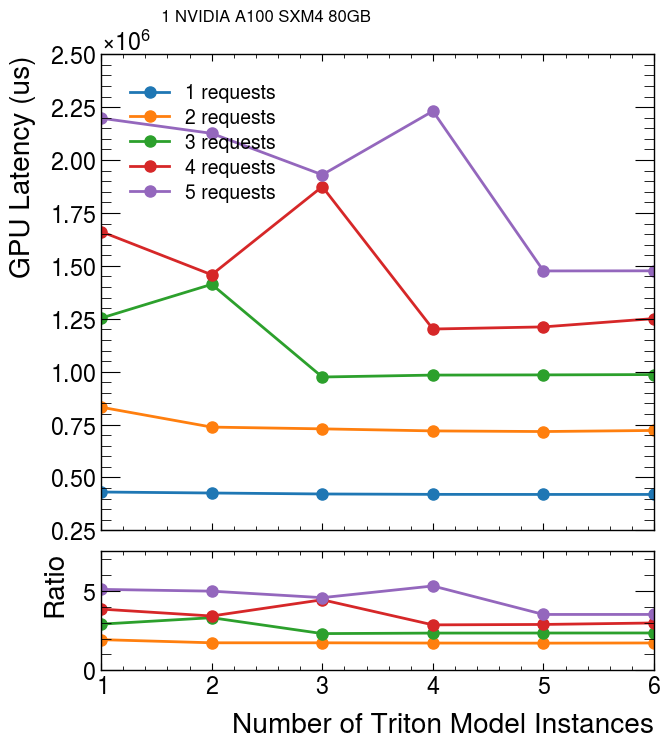

In [92]:
plot_var_vs_instance(gpu_data_instances, 
                        variable='p95 latency', 
                        ylabel='GPU Latency (us)',
                        save_name='instances_vs_latency_gpu.pdf')

## CPU Plots

#### Throughput studies

In [ ]:
plot_var_vs_instance(cpu_data_instances, 
                        ylabel='CPU Throughput (infer/sec)',
                        save_name='instances_vs_throughput_cpu.pdf')
plot_var_vs_concurrency(cpu_data_instances,
                        ylabel='CPU Throughput (infer/sec)',
                        save_name='concurrency_vs_throughput_cpu.pdf')

#### Latency

In [ ]:
plot_var_vs_instance(cpu_data_instances,
                        variable='Avg latency',
                        ylabel='CPU Latency (us)',
                        save_name='instances_vs_latency_cpu.pdf')

## CPU - GPU comparisons

#### Plotting function

In [ ]:
def plot_instance_cpu_gpu(cpu_data, gpu_data, concurrency=1, 
                          variable='Inferences/Second',
                          ylabel='Throughput (infer/sec)',
                          save_name='instances_vs_throughput_compare_con3.pdf',
                          outdir='data'):
    
    plt.figure(figsize=(6, 6))
    
    in_cpu = sorted(cpu_data.keys())
    in_gpu = sorted(gpu_data.keys())
    
    vals_cpu = []
    vals_gpu = []
    for i in in_cpu:
        val = cpu_data[i][cpu_data[i]['Concurrency'] == concurrency][variable].values
        if len(val) == 0:
            print(f'No data for {i} instances and {concurrency} \
                concurrent requests, setting to 0')
            vals_cpu.append(0.0)
        else:
            vals_cpu.append(val[0])
        
    for i in in_gpu:
        val = gpu_data[i][gpu_data[i]['Concurrency'] == concurrency][variable].values
        if len(val) == 0:
            print(f'No data for {i} instances and {concurrency} \
                concurrent requests, setting to 0')
            vals_gpu.append(0.0)
        else:
            vals_gpu.append(val[0])
        
    plt.plot(in_cpu, vals_cpu, label='CPU', marker='o')
    plt.plot(in_gpu, vals_gpu, label='GPU', marker='s')
    plt.xlabel('Number of Instances', loc='right')
    plt.ylabel(f'{ylabel} for {concurrency} concurrent requests', loc='top')
    plt.legend()
    
    plt.savefig(f'{outdir}/{save_name}', bbox_inches='tight')

#### Throughput comparisons

In [ ]:
for i in range(1, 6):
    plot_instance_cpu_gpu(cpu_data_instances, gpu_data_instances, concurrency=i,
                        save_name=f'instances_vs_throughput_compare_con{i}.pdf')

#### Latency comparisons

In [ ]:
for i in range(1, 6):
    plot_instance_cpu_gpu(cpu_data_instances, gpu_data_instances, 
                    concurrency=i,
                    variable='Avg latency',
                    ylabel='Average Latency (us)',
                    save_name=f'instances_vs_latency_compare_con{i}.pdf')